In [20]:
import numpy as np
import keras
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
mobile = keras.applications.mobilenet.MobileNet()

W0824 11:15:54.166348  3184 deprecation_wrapper.py:119] From C:\Users\H303937\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0824 11:15:54.194309  3184 deprecation_wrapper.py:119] From C:\Users\H303937\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0824 11:15:54.202299  3184 deprecation_wrapper.py:119] From C:\Users\H303937\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0824 11:15:54.242246  3184 deprecation_wrapper.py:119] From C:\Users\H303937\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please

17227776/17225924 [==============================] - 325s 19us/step


In [17]:
mobile.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [5]:
def prepare_image(file):
    img_path = "my_image/"
    img = image.load_img(img_path + file , target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis =0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

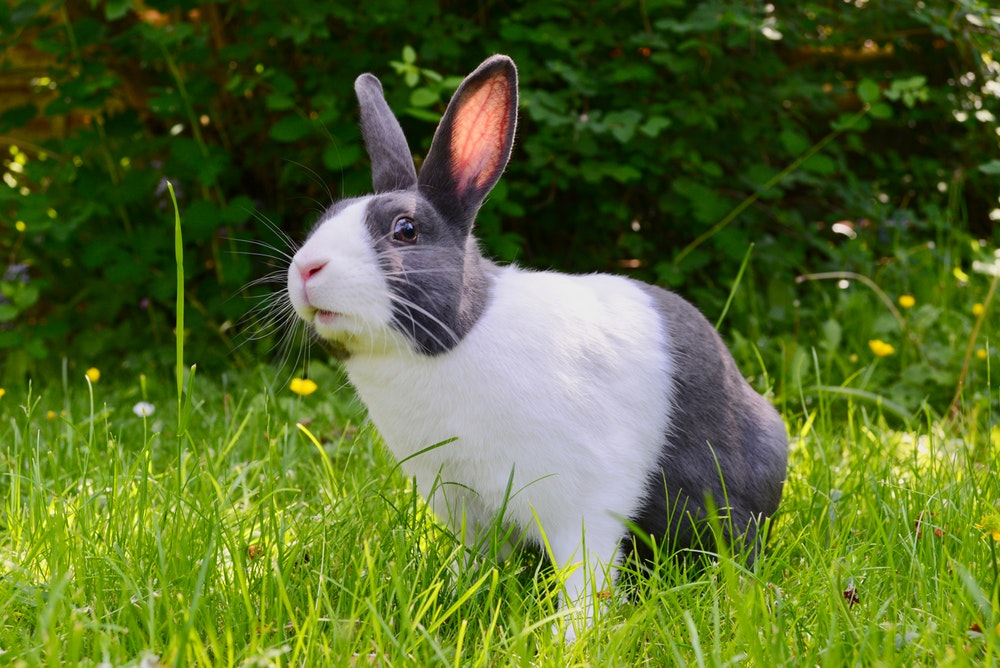

In [7]:
from IPython.display import Image
Image(filename = "rabbit.png", width = 300, height = 200)

In [10]:
preprocessed_image = prepare_image('rabbit.png')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)

40960/35363 [==================================] - 0s 1us/step


In [15]:
results

[[('n02326432', 'hare', 0.7904754),
  ('n02325366', 'wood_rabbit', 0.13802126),
  ('n02328150', 'Angora', 0.046925344),
  ('n01806567', 'quail', 0.004268734),
  ('n02096585', 'Boston_bull', 0.0034891597)]]

# Image Preparation

In [18]:
train_path = "training_set/training_set"
test_path = "test_set/test_set"

In [40]:
train_batches = ImageDataGenerator(preprocessing_function= keras.applications.mobilenet.preprocess_input).\
flow_from_directory(train_path, target_size = (224,224), batch_size=10)

Found 2536 images belonging to 2 classes.


In [41]:
test_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).\
flow_from_directory(test_path, target_size = (224,224), batch_size =10)

Found 943 images belonging to 2 classes.


# Modify Model

In [25]:
mobile = keras.applications.mobilenet.MobileNet()

In [26]:
mobile.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [27]:
#fetching output of last but 6th layer - global average pooling layer output
x = mobile.layers[-6].output

In [29]:
predictions = Dense(2, activation ="softmax")(x)
model_new = Model(inputs = mobile.input, outputs= predictions)

In [31]:
model_new.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [33]:
for layers in model_new.layers[:-5]:
    layers.trainable = False
    

# Train the model

In [38]:
model_new.compile(adam(lr=0.0001), loss= "categorical_crossentropy", metrics =['accuracy'])

In [43]:
model_new.fit_generator(train_batches, steps_per_epoch= 253, epochs  = 5, verbose = 2) 

Epoch 1/5
 - 335s - loss: 0.1232 - acc: 0.9561
Epoch 2/5
 - 335s - loss: 0.0922 - acc: 0.9636
Epoch 3/5
 - 334s - loss: 0.0761 - acc: 0.9685
Epoch 4/5
 - 336s - loss: 0.0620 - acc: 0.9794
Epoch 5/5
 - 334s - loss: 0.0553 - acc: 0.9783


# Predict cats and dogs


In [44]:
test_labels = test_batches.classes

In [45]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
test_batches.class_indices

{'cats': 0, 'dogs': 1}

In [51]:
predictions = model_new.predict_generator(test_batches, steps = 94.3, verbose = 2)

In [52]:
cm = confusion_matrix(test_labels, predictions.argmax(axis = 1))

In [53]:
test_batches.class_indices

{'cats': 0, 'dogs': 1}

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title= 'Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation ='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis = 1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    print(cm)
    
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment ="center",
                color = "white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
    

Confusion matrix, without normalization
[[231 212]
 [250 250]]


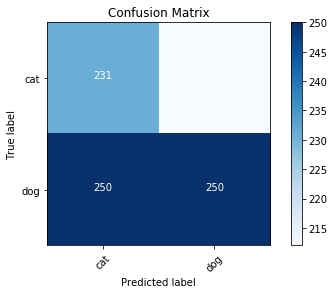

In [64]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title ="Confusion Matrix")